In [114]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [154]:
stock_df=pd.read_csv('/kaggle/input/tesla-stock-price-dataset/Tesla Dataset.csv')
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [117]:
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3509.000000,3509.000000,3509.000000,3509.000000,3509.000000,3.509000e+03
mean,74.057486,75.666813,72.324719,74.032508,74.032508,9.683246e+07
std,101.999514,104.244555,99.528061,101.915952,101.915952,7.894845e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,11.346000,11.580000,11.037333,11.328667,11.328667,4.716300e+07
50%,17.334000,17.563999,16.974667,17.330667,17.330667,8.203590e+07
75%,147.783340,150.940002,143.566666,147.383331,147.383331,1.226560e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [118]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3509 non-null   object 
 1   Open       3509 non-null   float64
 2   High       3509 non-null   float64
 3   Low        3509 non-null   float64
 4   Close      3509 non-null   float64
 5   Adj Close  3509 non-null   float64
 6   Volume     3509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.0+ KB


In [119]:
stock_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [156]:
stock_df.Date=pd.to_datetime(stock_df.Date)

In [121]:
date=stock_df.Date.dt.year

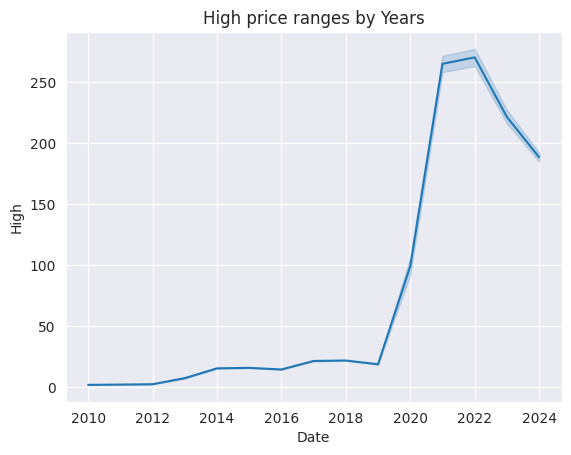

In [122]:
sns.set_style('darkgrid')
sns.lineplot(stock_df,x=date,y='High')
plt.title('High price ranges by Years')
plt.show()

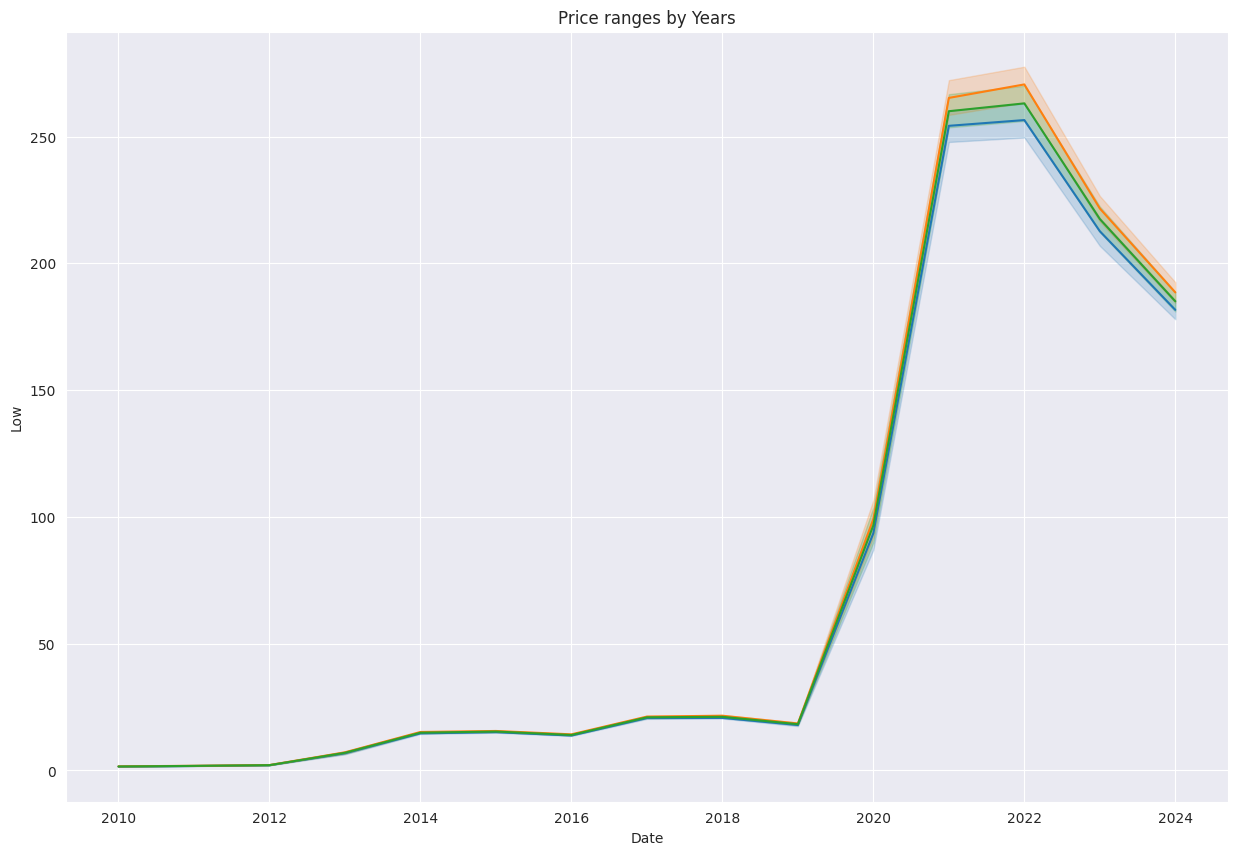

In [123]:
plt.figure(figsize=(15,10))
sns.lineplot(stock_df,x=date,y='Low')
sns.lineplot(stock_df,x=date,y='High')
sns.lineplot(stock_df,x=date,y='Close')
plt.title('Price ranges by Years')
plt.show()

[]

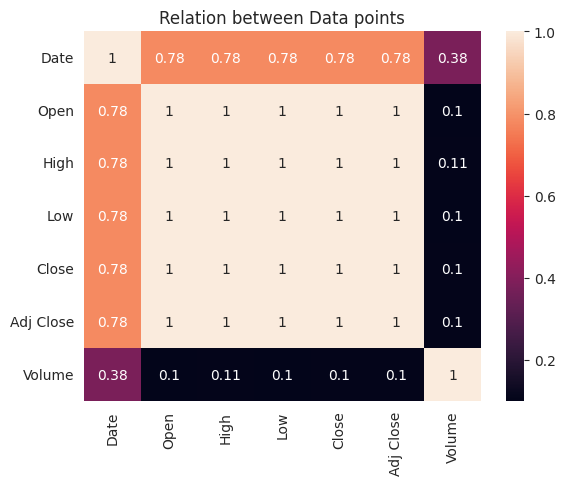

In [124]:
sns.heatmap(stock_df.corr(),annot=True)
plt.title('Relation between Data points')
plt.plot()

[]

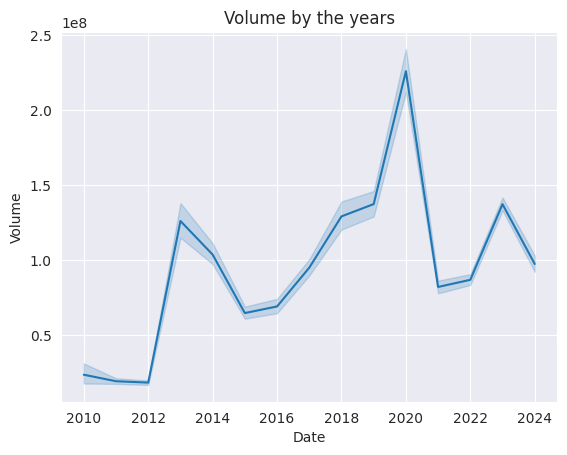

In [125]:
sns.lineplot(stock_df,x=date,y='Volume')
plt.title('Volume by the years')
plt.plot()

[]

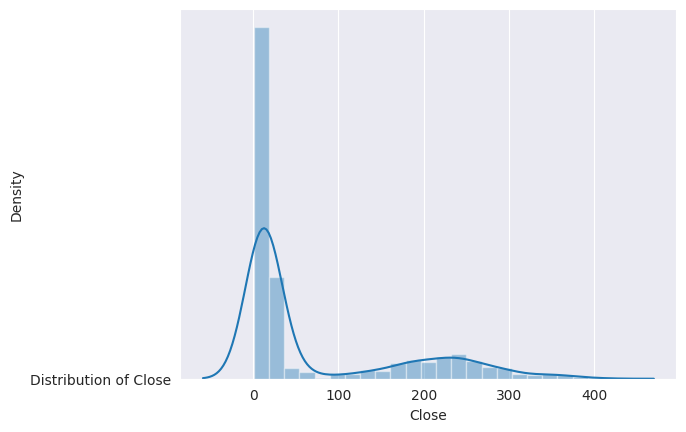

In [126]:
sns.distplot(stock_df.Close)
plt.plot('Distribution of Close')
plt.plot()

[]

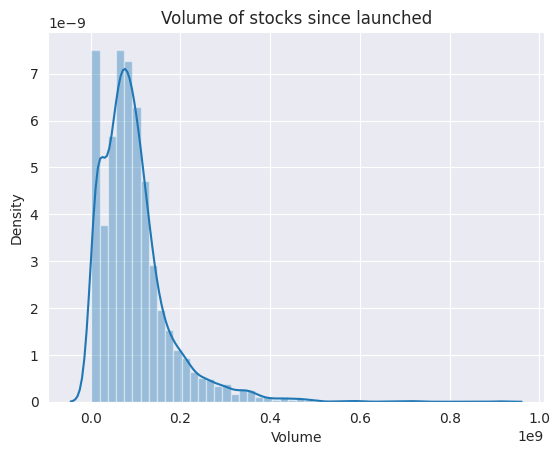

In [127]:
sns.distplot(stock_df.Volume)
plt.title('Volume of stocks since launched')
plt.plot()

[]

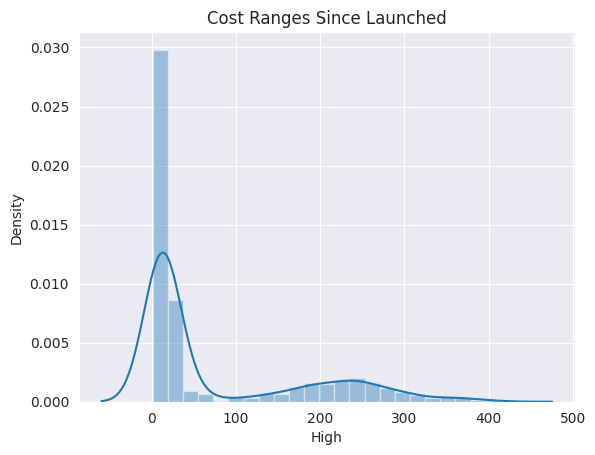

In [128]:
sns.distplot(stock_df.High)
plt.title('Cost Ranges Since Launched')
plt.plot()

In [160]:
X=stock_df.loc[:,[ 'Open', 'High', 'Low','Volume']]
y=stock_df['Close']

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape,X_test.shape

((2807, 4), (702, 4))

In [162]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

model1.fit(X_train,y_train)

LinearRegression()

In [163]:
y_pred=model1.predict(X_test)

In [164]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Mean squred Error :{mse}")
print(f"r2_score :{score}")

Mean squred Error :2.6702829949657687
r2_score :0.9997525281522605


In [165]:
from sklearn.linear_model import Lasso
model2=Lasso(alpha=0.1)
model2.fit(X_train,y_train)

Lasso(alpha=0.1)

In [166]:
y_pred=model2.predict(X_test)

In [167]:
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Mean squred Error :{mse}")
print(f"r2_score :{score}")

Mean squred Error :9.519332221146074
r2_score :0.9991177838684306
